In [20]:
import numpy as np
import pandas as pd
import datetime
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 

In [2]:
x = pd.read_csv("../Data_Crowdsourced_Mapping/training.csv",sep=",")
X_train = x.drop(columns=["class"])
y_train = x["class"]

In [3]:
n_components = len(X_train.columns)

ACP sans modification des axes 

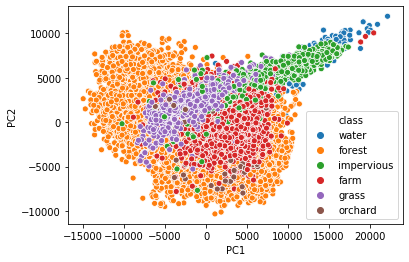

<BarContainer object of 28 artists>

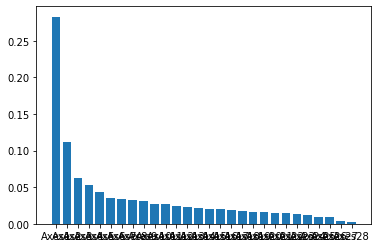

In [4]:
cls = PCA(n_components=n_components)
pcs_x = cls.fit_transform(X_train)

df_x = pd.DataFrame(pcs_x, columns=[f"PC{i}" for i in range(1, 29)])
sns.scatterplot(x="PC1", y="PC2", hue=x['class'],data=df_x)
plt.show()

plt.bar(["Axes"+str(i) for i in range(1,29)],cls.explained_variance_ratio_)

Text(0, 0.5, 'Eigen values')

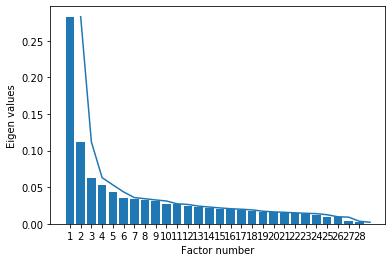

In [11]:
plt.bar([str(i) for i in range(1,29)],cls.explained_variance_ratio_)
plt.plot(np.arange(1,28+1),cls.explained_variance_ratio_)
plt.xlabel("Factor number")
plt.ylabel("Eigen values")

ACP sans la classe max NDVI 

idx la corrélation la plus élevée est 9


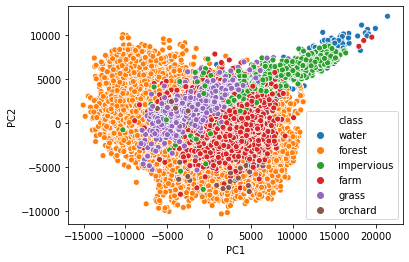

<BarContainer object of 27 artists>

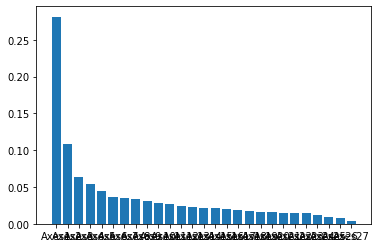

In [12]:
X_train_noMaxNDVI = X_train.drop(columns=["max_ndvi"])
idx = np.argmax(X_train_noMaxNDVI.corr().sum(axis=0).to_numpy())
print('idx la corrélation la plus élevée est',idx)

cls = PCA(n_components=27)
pcs_x = cls.fit_transform(X_train_noMaxNDVI)

df_x = pd.DataFrame(pcs_x, columns=[f"PC{i}" for i in range(1, 28)])
sns.scatterplot(x="PC1", y="PC2", hue=x['class'],data=df_x)
plt.show()

plt.bar(["Axes"+str(i) for i in range(1,28)],cls.explained_variance_ratio_)

In [13]:
idx = np.argmax(X_train.corr().sum(axis=0).to_numpy())
print('idx la corrélation la plus élevée est',idx)
taille3 = X_train.iloc[:, idx]
X_train_DivAxe = X_train.div(taille3,axis=0)
X_train_DivAxe = X_train_DivAxe.drop(X_train_DivAxe.columns[idx], axis=1)

idx la corrélation la plus élevée est 0


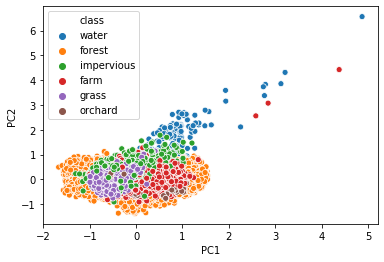

<BarContainer object of 27 artists>

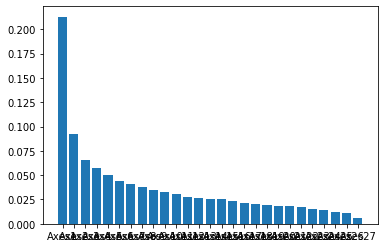

In [14]:
cls = PCA(n_components=27)
pcs_x = cls.fit_transform(X_train_DivAxe)

df_x = pd.DataFrame(pcs_x, columns=[f"PC{i}" for i in range(1, 28)])
sns.scatterplot(x="PC1", y="PC2", hue=x['class'],data=df_x)
plt.show()

plt.bar(["Axes"+str(i) for i in range(1,28)],cls.explained_variance_ratio_)

Text(0, 0.5, 'Eigen values')

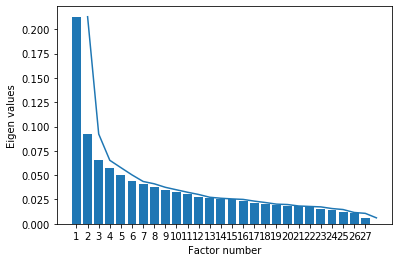

In [17]:
plt.bar([str(i) for i in range(1,28)],cls.explained_variance_ratio_)
plt.plot(np.arange(1,27+1),cls.explained_variance_ratio_)
plt.xlabel("Factor number")
plt.ylabel("Eigen values")

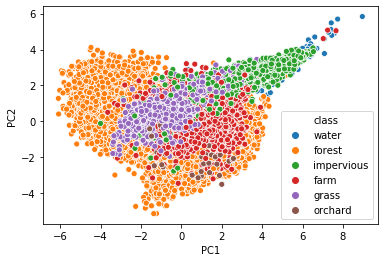

Text(0, 0.5, 'Eigen values')

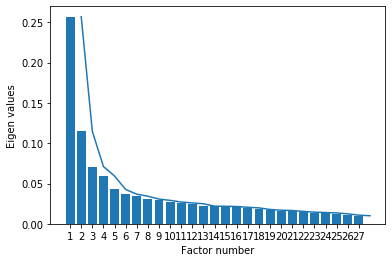

In [24]:
X_train_CR = x.drop(columns=["max_ndvi"])
X_train_CR = X_train_CR.drop(columns=["class"])

sc = StandardScaler() 
x_std = sc.fit_transform(X_train_CR) # données centrées et reduites 

X_train_CR = pd.DataFrame(x_std,columns=X_train_CR.columns)
X_train_CR

cls = PCA(n_components=27)
pcs_x = cls.fit_transform(X_train_CR)

df_x = pd.DataFrame(pcs_x, columns=[f"PC{i}" for i in range(1, 28)])
sns.scatterplot(x="PC1", y="PC2", hue=x['class'],data=df_x)
plt.show()

plt.bar([str(i) for i in range(1,28)],cls.explained_variance_ratio_)
plt.plot(np.arange(1,27+1),cls.explained_variance_ratio_)
plt.xlabel("Factor number")
plt.ylabel("Eigen values")